In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Rading Data

In [23]:
df = pd.read_parquet("./stock_1d.parquet")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,2013-01-02,94.190002,94.790001,93.959999,94.779999,67.895119,3206700.0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2013-01-03,94.339996,94.930000,94.129997,94.669998,67.816322,2704600.0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,2013-01-04,94.790001,95.480003,94.540001,95.370003,68.317757,2704900.0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
3,2013-01-07,95.019997,95.730003,94.760002,95.489998,68.403717,2745800.0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
4,2013-01-08,95.169998,95.750000,95.099998,95.500000,68.410889,2655500.0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


In [24]:
df1 = pd.read_parquet("./stock_1h.parquet")
df1.head()

,index,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,2022-01-03 09:30:00-05:00,178.320007,179.089996,176.429993,177.214996,177.214996,384623.0,MMM,None,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2022-01-03 10:30:00-05:00,177.179993,177.199997,176.244995,176.820007,176.820007,158291.0,MMM,None,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,2022-01-03 11:30:00-05:00,176.759995,176.785004,176.139999,176.529999,176.529999,125963.0,MMM,None,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
3,2022-01-03 12:30:00-05:00,176.570007,176.580002,175.839996,176.440002,176.440002,123903.0,MMM,None,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
4,2022-01-03 13:30:00-05:00,176.449997,177.259995,176.220001,177.089996,177.089996,116232.0,MMM,None,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


In [25]:
df2 = pd.read_parquet("./stock_1m.parquet")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Datetime,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,None,88.919998,89.059998,88.919998,88.980003,88.980003,133052.0,MMM,2023-10-16 09:30:00-04:00,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,None,89.029999,89.250000,89.029999,89.212601,89.212601,4748.0,MMM,2023-10-16 09:31:00-04:00,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,None,89.260002,89.260002,89.116798,89.165001,89.165001,3267.0,MMM,2023-10-16 09:32:00-04:00,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
3,None,89.199997,89.254997,89.135002,89.190002,89.190002,2168.0,MMM,2023-10-16 09:33:00-04:00,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
4,None,89.125000,89.180000,89.044998,89.180000,89.180000,4947.0,MMM,2023-10-16 09:34:00-04:00,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


# Data Cleaning #

In [26]:
print(df.isnull().sum())

Date                         0
Open                        14
High                        14
Low                         14
Close                       14
Adj Close                   14
Volume                      14
Symbol                       0
Security                     0
GICS Sector                  0
GICS Sub-Industry            0
Headquarters Location        0
Date added               27330
CIK                          0
Founded                      0
dtype: int64


In [27]:
print(df1.isnull().sum())

index                          0
Open                          36
High                          36
Low                           36
Close                         36
Adj Close                     36
Volume                        36
Symbol                         0
Date                     1606007
Security                       0
GICS Sector                    0
GICS Sub-Industry              0
Headquarters Location          0
Date added                 32560
CIK                            0
Founded                        0
dtype: int64


In [28]:
print(df2.isnull().sum())

Date                     2733118
Open                           8
High                           8
Low                            8
Close                          8
Adj Close                      8
Volume                         8
Symbol                         0
Datetime                       0
Security                       0
GICS Sector                    0
GICS Sub-Industry              0
Headquarters Location          0
Date added                 55997
CIK                            0
Founded                        0
dtype: int64


In [29]:
# Handle missing values (dropping)
df = df.dropna()
df1 = df1.dropna()
df2 = df2.dropna()

In [21]:
numerical_columns_df = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_df1 = df1.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_df2 = df2.select_dtypes(include=['float64', 'int64']).columns

if df.empty:
    print("The DataFrame is empty.")
else:
    if df[numerical_columns_df].dropna().empty:
        print("The selected columns for scaling are empty or contain only NaN values.")
    else:
        scaler = StandardScaler()
        df[numerical_columns_df] = scaler.fit_transform(df[numerical_columns_df])
        print("Standardization applied successfully.")
        
if df1.empty:
    print("The DataFrame 1 is empty.")
else:
    if df1[numerical_columns_df1].dropna().empty:
        print("The selected columns for scaling are empty or contain only NaN values.")
    else:
        scaler = StandardScaler()
        df1[numerical_columns_df1] = scaler.fit_transform(df1[numerical_columns_df1])
        print("Standardization applied successfully.")
        
if df1.empty:
    print("The DataFrame 2 is empty.")
else:
    if df2[numerical_columns_df2].dropna().empty:
        print("The selected columns for scaling are empty or contain only NaN values.")
    else:
        scaler = StandardScaler()
        df2[numerical_columns_df2] = scaler.fit_transform(df2[numerical_columns_df2])
        print("Standardization applied successfully.")

Standardization applied successfully.
The DataFrame 1 is empty.
The DataFrame 2 is empty.


# Time Series charts

I have randomly selected a stock symbol from the dataset and plot its closing price over time. 
This kind of visualization is fundamental in financial data analysis, as it provides insights into the stock's performance, trends, and potential patterns.

/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/2076820996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


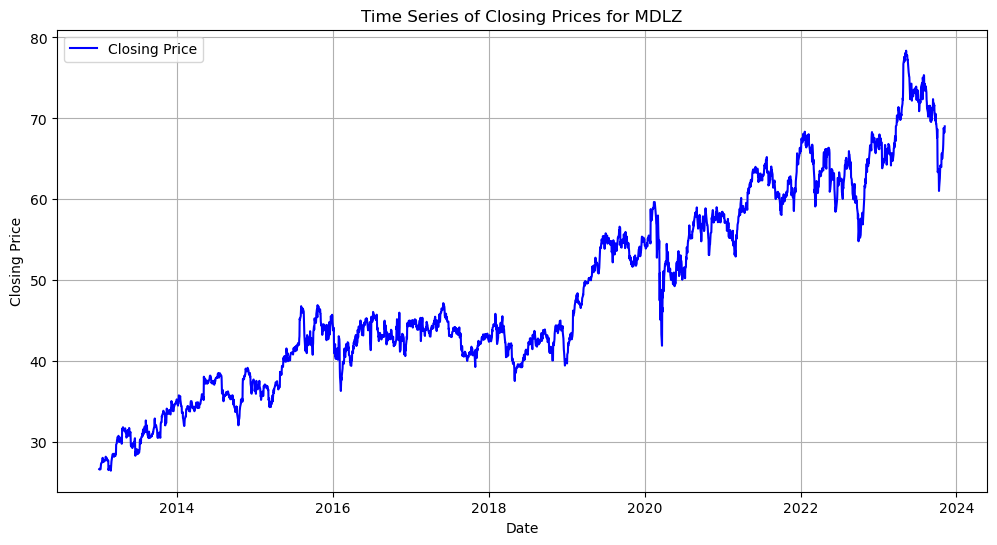

In [33]:
# Can be replaced with our chosen symbol on Friday
stock_symbol = 'MDLZ'
# Filtering
stock_data = df[df['Symbol'] == stock_symbol]
# Converting the Date column to datetime for proper plotting
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
plt.title(f'Time Series of Closing Prices for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In the case of MDLZ, there appears to be a general upward trend over the long term, indicating an increase in the stock value.

The fluctuations in the stock price over time indicate periods of volatility.

Any sharp spikes or drops may be indicative of specific events or market conditions affecting the stock.

Any recurring patterns around certain times of the year could suggest seasonality.

The end part of the graph shows the most recent performance of the stock.

# Seasonality Analysis

Exploring seasonality trends in the stock data. 

Seasonality refers to periodic fluctuations that occur at regular intervals due to seasonal factors. In stock markets, this could be related to quarterly financial reports, annual events, or specific market cycles.

/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/1171049145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/1171049145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Month'] = stock_data['Date'].dt.month


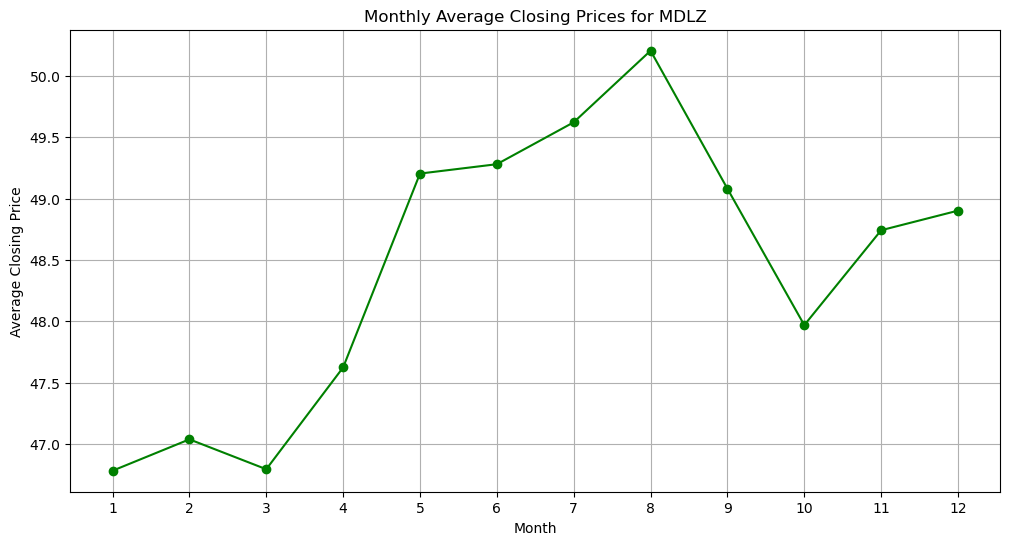

In [36]:
# Converting the Date column to datetime and extract month
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Month'] = stock_data['Date'].dt.month

# Grouping the data by month and calculating the average closing price for each month
monthly_avg = stock_data.groupby('Month')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='green')
plt.title(f'Monthly Average Closing Prices for {stock_symbol}')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13))  # Set x-ticks to represent each month
plt.grid(True)
plt.show()

The chart indicates the average closing price of the stock for each month over the period from 2013 to 2023.
If certain months consistently show higher or lower averages, this could suggest a seasonal pattern.

# Correlations

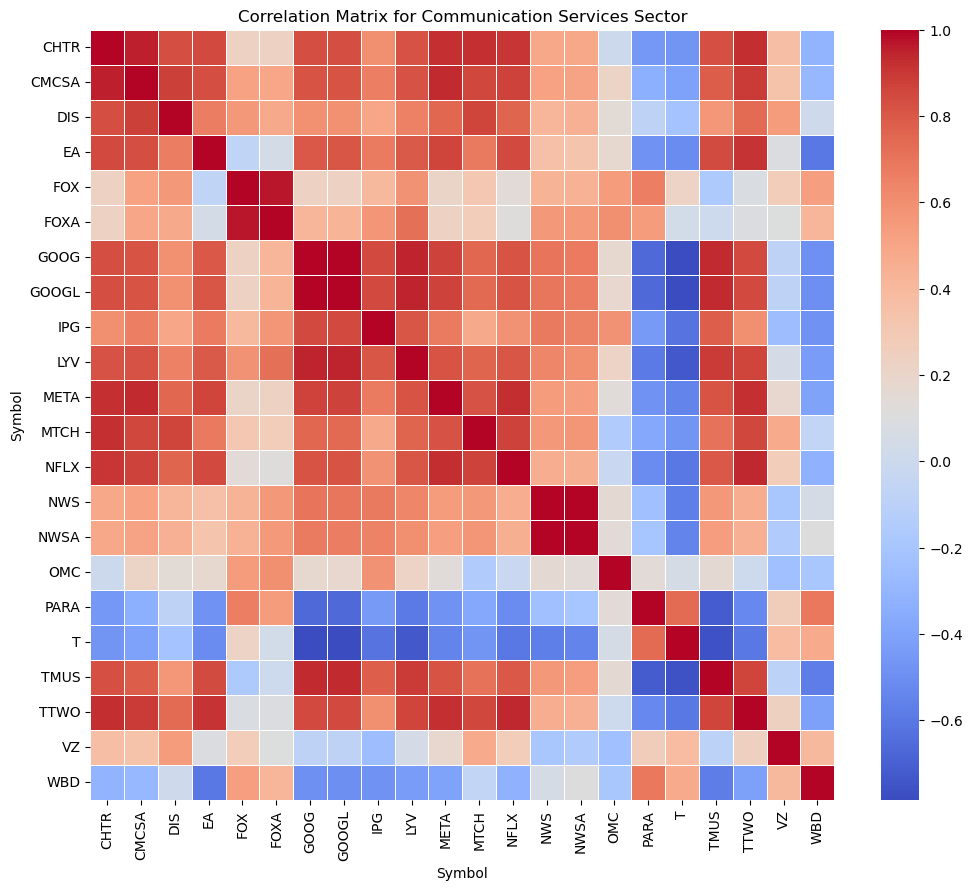

In [48]:
# Selecting a particular sector
selected_sector = np.random.choice(df['GICS Sector'].unique())

# Extracting data for the selected sector
sector_data = df[df['GICS Sector'] == selected_sector]

# Pivoting the data to get closing prices of each stock in the sector on each date
pivot_data = sector_data.pivot_table(values='Close', index='Date', columns='Symbol')

# The correlation matrix
correlation_matrix = pivot_data.corr()

plt.figure(figsize=(12, 10))
plt.title(f'Correlation Matrix for {selected_sector} Sector')
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.show()

Areas in the heatmap with a warmer color (towards red) indicate a strong positive correlation, meaning these stocks' closing prices tend to move in the same direction.

Cooler colors (towards blue) suggest little to no correlation, indicating that the closing prices of these stocks do not strongly influence each other.

# Moving Average

Moving averages smooth out price data to create a single flowing line, which makes it easier to identify the direction of the trend.

Here we will have 50-day SMA and EMA.

/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/925626330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/925626330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['50-day SMA'] = stock_data['Close'].rolling(window=50).mean()
/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/925626330.py:6: SettingWithCopyWarning: 
A value is trying to be

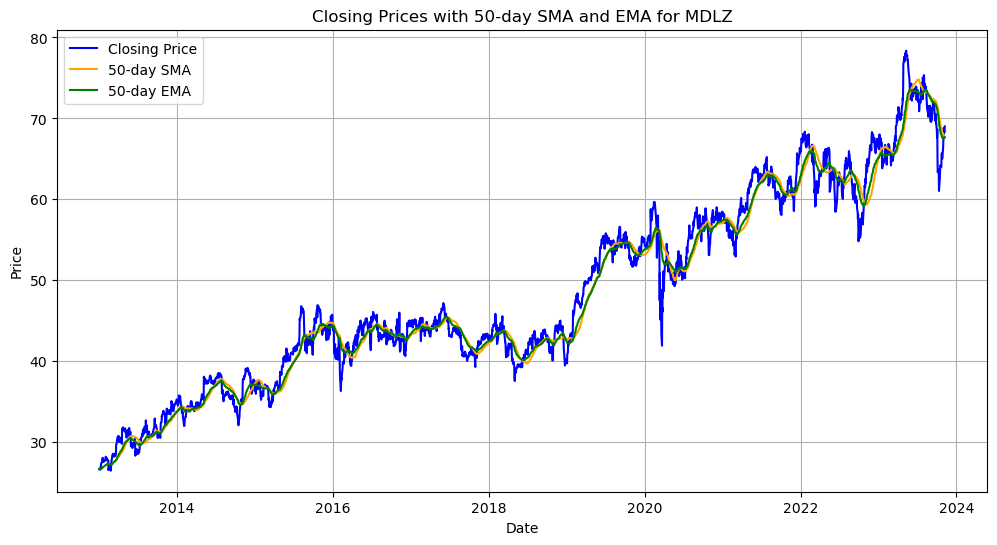

In [49]:
# Convert the Date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Calculating the 50-day SMA and EMA
stock_data['50-day SMA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['50-day EMA'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
plt.plot(stock_data['Date'], stock_data['50-day SMA'], label='50-day SMA', color='orange')
plt.plot(stock_data['Date'], stock_data['50-day EMA'], label='50-day EMA', color='green')
plt.title(f'Closing Prices with 50-day SMA and EMA for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Daily Returns

Daily Return is the percentage change in the stock price from one day to the next. We will use python `pct_change()` function for this

/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/1864275958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/1864275958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Daily Returns'] = stock_data['Close'].pct_change()


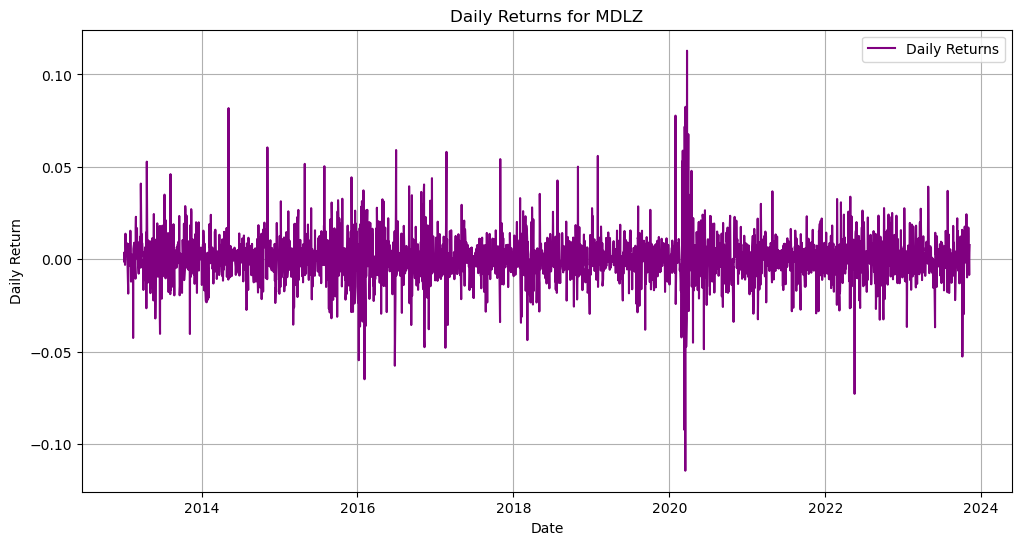

In [50]:
# Convert the Date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Calculating the daily returns
stock_data['Daily Returns'] = stock_data['Close'].pct_change()

# Plotting the daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Daily Returns'], label='Daily Returns', color='purple')
plt.title(f'Daily Returns for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Volatility

/var/folders/vg/3tc67w_j4dxc1ybwnp_wvf_00000gp/T/ipykernel_14372/3606784906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Volatility'] = stock_data['Daily Returns'].rolling(window=30).std() * (252**0.5)


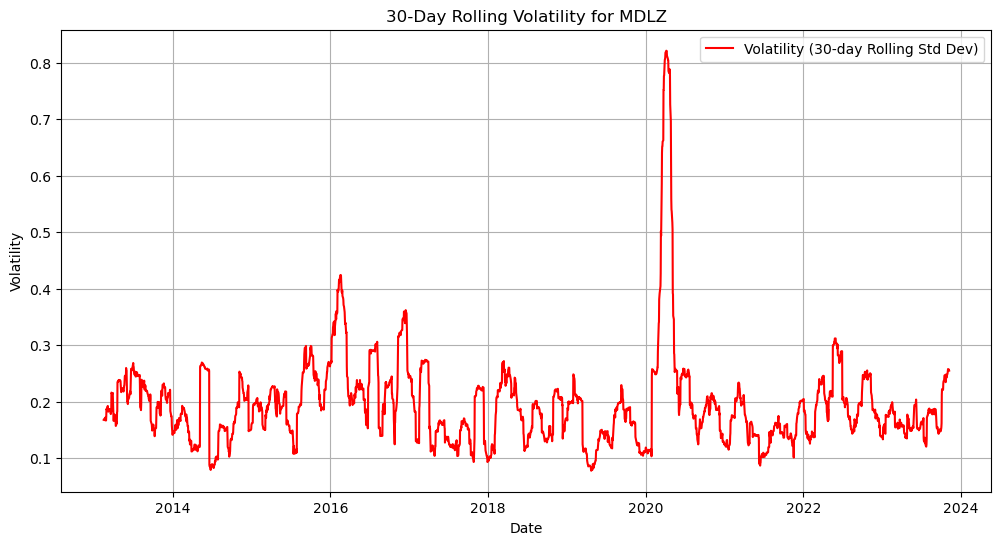

In [51]:
# Calculating the 30-day rolling standard deviation of the daily returns (annualized)
stock_data['Volatility'] = stock_data['Daily Returns'].rolling(window=30).std() * (252**0.5)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Volatility'], label='Volatility (30-day Rolling Std Dev)', color='red')
plt.title(f'30-Day Rolling Volatility for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [218]:
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt


In [219]:
data_path = './data/stock_1d.parquet'
data = pd.read_parquet(data_path)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1330238 entries, 0 to 1330237
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1330238 non-null  datetime64[us]
 1   Open                   1330224 non-null  float64       
 2   High                   1330224 non-null  float64       
 3   Low                    1330224 non-null  float64       
 4   Close                  1330224 non-null  float64       
 5   Adj Close              1330224 non-null  float64       
 6   Volume                 1330224 non-null  float64       
 7   Symbol                 1330238 non-null  object        
 8   Security               1330238 non-null  object        
 9   GICS Sector            1330238 non-null  object        
 10  GICS Sub-Industry      1330238 non-null  object        
 11  Headquarters Location  1330238 non-null  object        
 12  Date added             1302908 no

Date: Date of the data. </br>

Open, High, Low, Close: Prices during the trading day. </br>

Adj Close: Adjusted closing price considering corporate actions, usually better represents actual close. </br>

Volume: Total shares traded. </br>

Symbol: Unique identifier (e.g., stock ticker). </br>

Security: Description of the financial instrument. </br>

GICS Sector, GICS Sub-Industry: Industry classification. </br>

Headquarters Location: Location of the company's headquarters. </br>

Date added: Date the data was recorded. </br>

CIK: (Central Index key) Unique identifier assigned by SEC. </br>

Founded: Founding date or year of the company. </br>

In [234]:
Sym = 'AAPL'
Close = 'Adj Close' 
#write 'Close' or 'Adj Close' to choose
# As far as I have found Close is better for short term and Adj Close is better for long term analysis as it considers actions of the company like dividends and stuff

Sym_data = data[data['Symbol'] == Sym]
Sym_data = Sym_data[Sym_data['Date']< datetime.now()]
Sym_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
115293,2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800.0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
115294,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700.0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
115295,2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300.0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
115296,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000.0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
115297,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49340300.0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977


In [235]:
#Basic Stats:

summary_stats = Sym_data.describe()

# Extracting Mean, Median, Standard Deviation, and Percentiles
mean_price = summary_stats.loc['mean', Close]
median_price = Sym_data[Close].median()
std_dev_price = summary_stats.loc['std', Close]
percentile_25 = Sym_data[Close].quantile(0.25)
percentile_75 = Sym_data[Close].quantile(0.75)

# Displaying the Summary Statistics
print("Mean Price: {:.2f}".format(mean_price))
print("Median Price: {:.2f}".format(median_price))
print("Standard Deviation: {:.2f}".format(std_dev_price))
print("25th Percentile: {:.2f}".format(percentile_25))
print("75th Percentile: {:.2f}".format(percentile_75))

Mean Price: 68.93
Median Price: 41.65
Standard Deviation: 55.63
25th Percentile: 25.15
75th Percentile: 125.10


In [236]:
#Simple Moving Averages (SMA) 
Sym_data['SMA_50'] = Sym_data[Close].rolling(window=50).mean()
Sym_data['SMA_200'] = Sym_data[Close].rolling(window=200).mean()

#Exponential Moving Averages (EMA)
Sym_data['EMA_12'] = Sym_data[Close].ewm(span=12, adjust=False).mean()
Sym_data['EMA_26'] = Sym_data[Close].ewm(span=26, adjust=False).mean()

#Relative Strength Index (RSI)
delta = Sym_data[Close].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

rs = average_gain / average_loss
Sym_data['RSI'] = 100 - (100 / (1 + rs))


#Moving Average Convergance Divergence (MACD)
Sym_data['MACD'] = Sym_data['EMA_12'] - Sym_data['EMA_26']
Sym_data['Signal_Line'] = Sym_data['MACD'].ewm(span=9, adjust=False).mean()
cross_above = (Sym_data['MACD'] > Sym_data['Signal_Line']) & (Sym_data['MACD'].shift(1) <= Sym_data['Signal_Line'].shift(1))
cross_below = (Sym_data['MACD'] < Sym_data['Signal_Line']) & (Sym_data['MACD'].shift(1) >= Sym_data['Signal_Line'].shift(1))


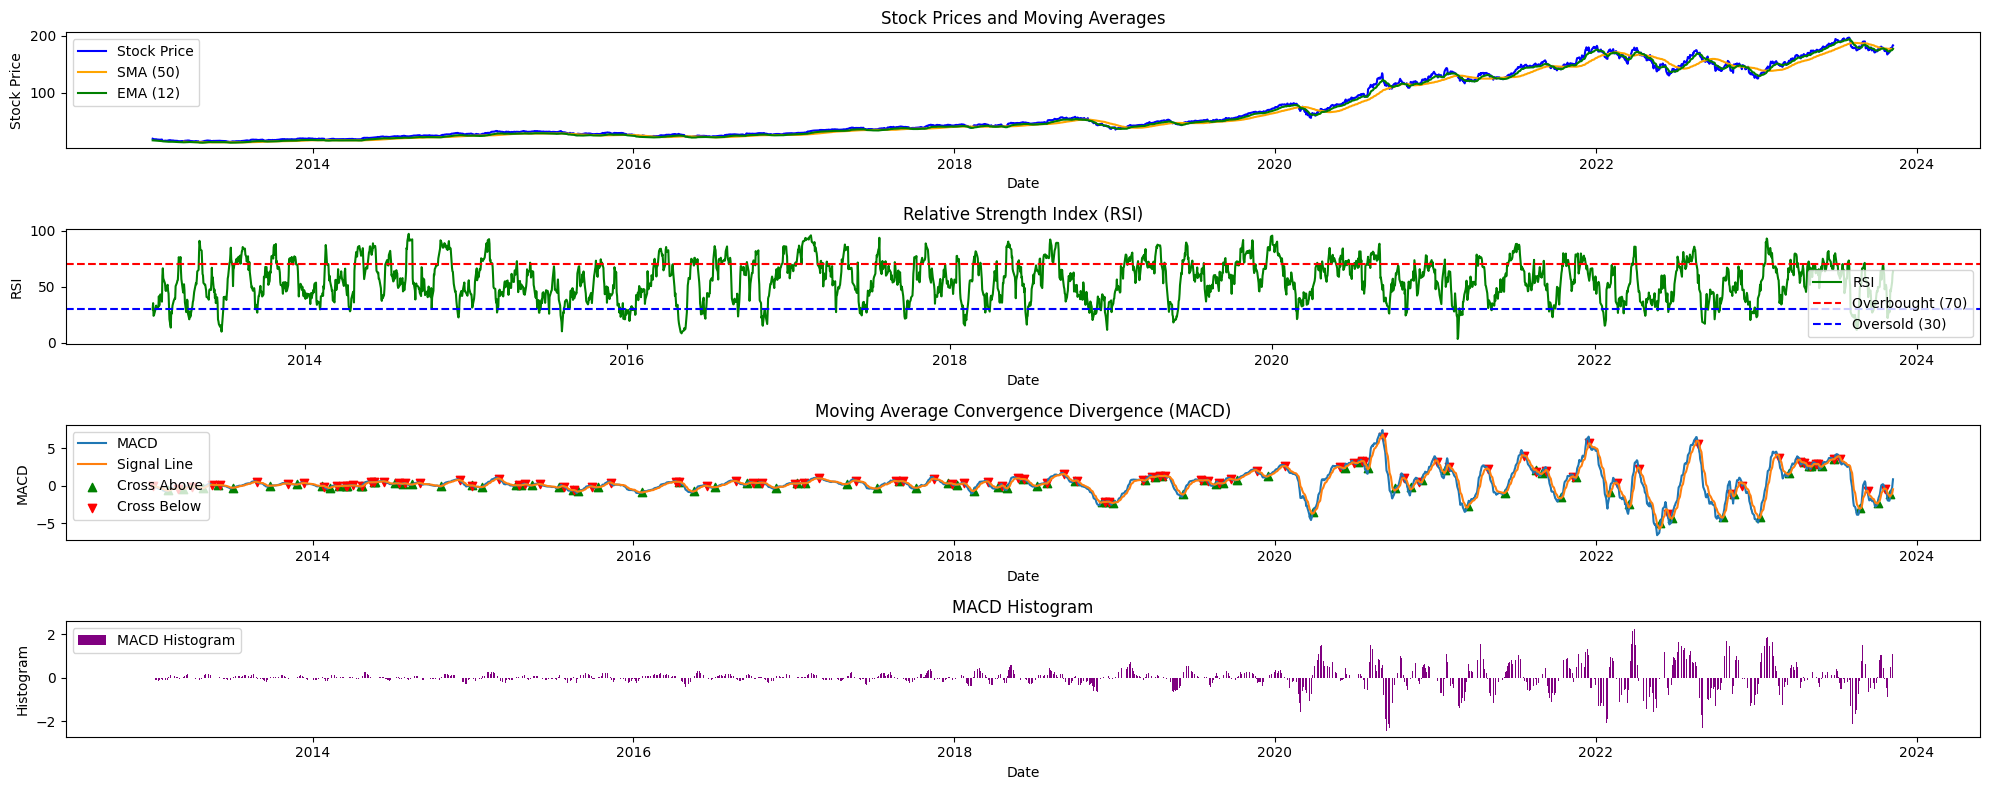

In [239]:
plt.figure(figsize=(20, 8))

# Subplot 1: Stock Prices and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(Sym_data['Date'], Sym_data['Close'], label='Stock Price', color='blue')
plt.plot(Sym_data['Date'], Sym_data['SMA_50'], label='SMA (50)', color='orange')
plt.plot(Sym_data['Date'], Sym_data['EMA_12'], label='EMA (12)', color='green')
plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Subplot 2: RSI
plt.subplot(4, 1, 2)
plt.plot(Sym_data['Date'], Sym_data['RSI'], label='RSI', color='green')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='b', linestyle='--', label='Oversold (30)') #GENERALLY 30 and 70 are considered
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# Subplot 3: MACD
plt.subplot(4, 1, 3)
plt.plot(Sym_data['Date'], Sym_data['MACD'], label='MACD')
plt.plot(Sym_data['Date'], Sym_data['Signal_Line'], label='Signal Line')
# Add markers for crossovers
plt.scatter(Sym_data.loc[cross_above, 'Date'], Sym_data.loc[cross_above, 'MACD'], marker='^', color='g', label='Cross Above')
plt.scatter(Sym_data.loc[cross_below, 'Date'], Sym_data.loc[cross_below, 'MACD'], marker='v', color='r', label='Cross Below')

plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')

plt.legend()
# Plot MACD Histogram
plt.subplot(4, 1, 4)
plt.bar(Sym_data['Date'], Sym_data['MACD'] - Sym_data['Signal_Line'], color='purple', label='MACD Histogram')

plt.title('MACD Histogram')
plt.xlabel('Date')
plt.ylabel('Histogram')
plt.legend()



plt.tight_layout()
plt.show()


Calculating average monthly returns for clearly visible trends.

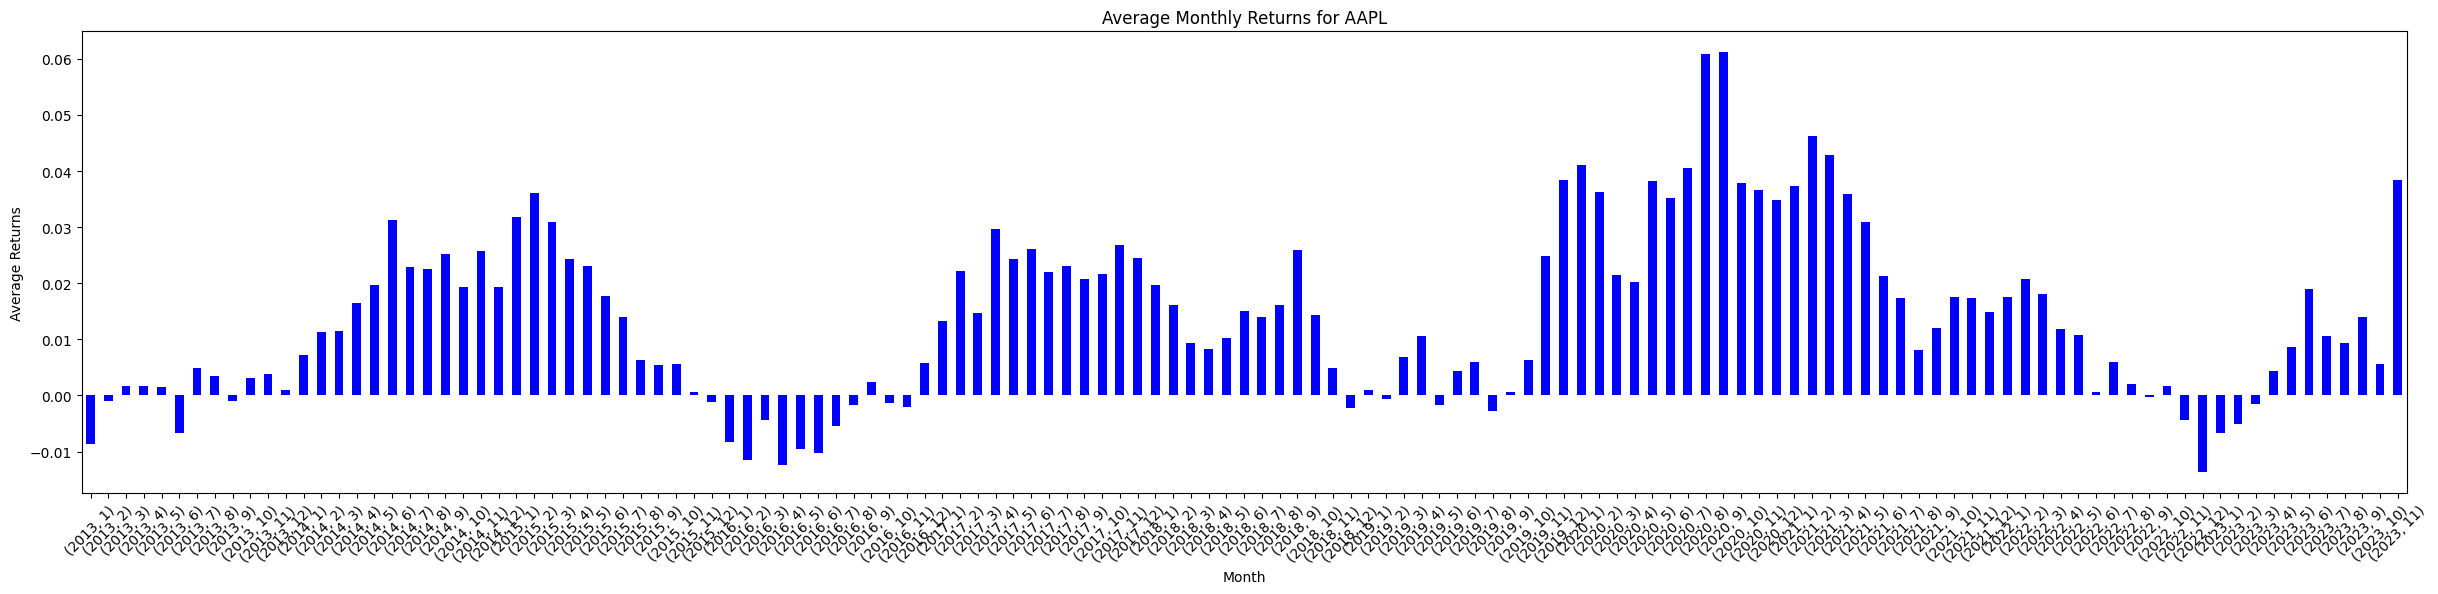

In [238]:
# Convert index to DatetimeIndex
Sym_data1 = Sym_data.set_index('Date')
# Extract Month and Day from the Date
Sym_data1['Year'] = Sym_data1.index.year
Sym_data1['Month'] = Sym_data1.index.month
Sym_data1['Day'] = Sym_data1.index.day
# Calculate Average Daily Returns for Each Month
Sym_data1['Daily_Return'] = Sym_data1.groupby(by='Month')[Close].pct_change()
average_returns_by_month = Sym_data1.groupby(['Year', 'Month'])['Daily_Return'].mean()

# Convert the result to a Pandas Series
average_returns_by_month = pd.Series(average_returns_by_month)

# Plotting
plt.figure(figsize=(30, 6))
average_returns_by_month.plot(kind='bar', color='blue')
plt.title('Average Monthly Returns for {}'.format(Sym))
plt.xlabel('Month')
plt.ylabel('Average Returns')
plt.xticks(rotation=45)
plt.show()
